In [9]:
# install ipywidgets
# jupyter nbextension enable --py widgetsnbextension
# pip install ipywidgets

SyntaxError: invalid syntax (2061305638.py, line 2)

In [2]:
import pandas as pd
import ipywidgets as widgets
from skimage import io
from skimage.io import imread, imshow

import asyncio
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import pickle
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt
import os
from functools import reduce
from sklearn.cluster import KMeans
from skimage import exposure
from skimage.transform import resize


import pickle
import matplotlib.pyplot as plt
import os
import time

import pandas as pd
from sqlalchemy import create_engine
from functools import reduce

from utils.read_data import *
from utils.visualize_data import *
from utils.correlations import *


import random


In [ ]:
#@title Take a look at the images in a shuffled order, without the labels. 
#@markdown * Do you see any tendencies? Look at the nuclei size, intensity of the stains.

df = pd.read_csv('/Users/secchim/Downloads/CellProfiler/movie_processing/movie_output/trackcorrect.csv', low_memory=False)


In [3]:
#@title Please run to activate dropdown function
def dropdown(input_list):
  import ipywidgets as widgets
  global dropdown_output
  drop_down = widgets.Dropdown(options=input_list,
                                  description='Choose',
                                  disabled=False)

  def dropdown_handler(change):
      global dropdown_output
      dropdown_output = change.new  # This line isn't working
  drop_down.observe(dropdown_handler, names='value')
  display(drop_down)
  dropdown_output = drop_down.value

In [57]:
#CHECKING DOUBLE POSITIVE STATUS MANUALLY 

#For the first cell run

df= pd.read_csv("/Users/secchim/Downloads/CellProfiler/movie_processing/movie_output/trackcorrect.csv", header = 0)
df['Final_Cell_ID']=df['Track_ID']
df['Timeframe_Time_no_date']='x'

for i in df.index: 
    df.loc[i,'Timeframe_Time_no_date']=str(df.loc[i,'Timeframe_Time'])[-8:]
print(df['Timeframe_Time_no_date'])

#for all the cells after that run 
#df= pd.read_csv('/Users/secchim/Documents/manuallychecked.csv', header = 0)

df_list = [option for option in list(df['Metadata_VWF'].unique())]
# df_list = [option for option in df.filter(regex=r'Metadata', axis=1).columns]
dropdown(df_list)

/var/folders/m1/973p2py16d5bwyw1r5whmn0hh54wfr/T/ipykernel_71365/551201159.py:5: DtypeWarning: Columns (393,407) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("/Users/secchim/Downloads/CellProfiler/movie_processing/movie_output/trackcorrect.csv", header = 0)


0       13:21:46
1       13:24:46
2       13:15:46
3       13:18:46
4       13:24:46
          ...   
2352    09:32:37
2353    09:35:37
2354    09:38:37
2355    09:41:37
2356    09:47:37
Name: Timeframe_Time_no_date, Length: 2357, dtype: object


Dropdown(description='Choose', options=('VWF_043_MS211125_m3-homeostasis_movie2_M1', 'VWF_043_MS211125_m3-home…

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


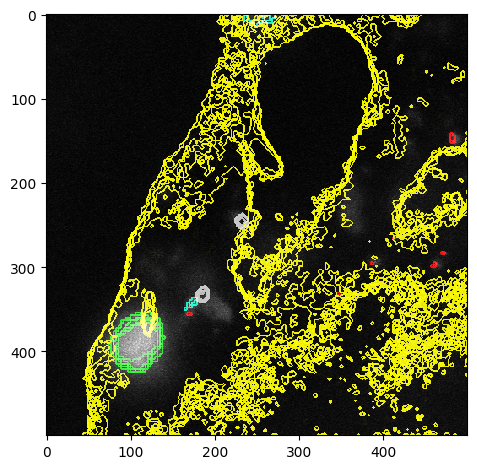

In [35]:
VWF_meta = dropdown_output
print(VWF_meta)

grouped=df[df['Metadata_VWF']==VWF_meta]
# print(grouped.shape[0])
print(len(grouped.index))
timeframe_length= len(grouped.index)

random_timeframe = random.randint(1, timeframe_length)

sample = '/Users/secchim/Downloads/CellProfiler/movie_processing/movie_output/'+VWF_meta+'/'+VWF_meta+'_Ch1_xyzCorrected.tif - T='+str(random_timeframe)+'GFP.tiff'
#sample = '/Users/secchim/Downloads/CellProfiler/movie_processing/1_tif'+VWF_meta+'Ch1_xyzCorrected.tif - T='+random_timeframe+'.tif'

sample_data = io.imread(sample)
# print(sample_data)
sample_data.shape
sample_max=sample_data[0,:,:]
print(sample_max)
# sample_max.shape
for i in range(0, sample_data.shape[0]):
    # print(i)
    sample_max= np.maximum(sample_max, sample_data[i,:,:])
# sample_max

imshow(sample_max/sample_data.max())


In [37]:
df_Hoxb5status = [option for option in ('yes', 'no','unclear')]
# df_list = [option for option in df.filter(regex=r'Metadata', axis=1).columns]
dropdown(df_Hoxb5status)

Dropdown(description='Choose', options=('yes', 'no'), value='yes')

In [ ]:
manual_Hoxb5status = dropdown_output
for i in df.index:
    if df.loc[i,'Metadata_VWF'] == VWF_meta:
        
        if manual_Hoxb5status == 'yes':
            df.loc[i,'Metadata_Hoxb5status'] = 'DP'
        elif manual_Hoxb5status == 'no':
            df[i,'Metadata_Hoxb5status'] = 'SP'
        else:
            print('unclear- rerun')
#df.to_csv('/Users/secchim/Documents/manuallychecked.csv')

# if manual_Hoxb5status == 'unclear':
#     random_timeframe = random.randint(1, timeframe_length)

#     sample = '/Users/secchim/Downloads/CellProfiler/movie_processing/movie_output/'+VWF_meta+'/'+VWF_meta+'_Ch1_xyzCorrected.tif - T='+str(random_timeframe)+'GFP.tiff'
#     #sample = '/Users/secchim/Downloads/CellProfiler/movie_processing/1_tif'+VWF_meta+'Ch1_xyzCorrected.tif - T='+random_timeframe+'.tif'

#     sample_data = io.imread(sample)
#     # print(sample_data)
#     sample_data.shape
#     sample_max=sample_data[0,:,:]
#     print(sample_max)
#     # sample_max.shape
#     for i in range(0, sample_data.shape[0]):
#         # print(i)
#         sample_max= np.maximum(sample_max, sample_data[i,:,:])
#     # sample_max

#     imshow(sample_max/sample_data.max())



In [52]:
#CHECKING TRACK LINKAGE 

#df= pd.read_csv('/Users/secchim/Documents/manuallychecked.csv', header = 0)
VWF_Cell=grouped['Cell_group'].unique()
print(VWF_Cell)


grouped2=df[df['Cell_group']==VWF_Cell[0]]
# print(grouped.shape[0])
print(len(grouped.index))
timeframe_length= len(grouped.index)
# print(grouped2)

# sample = '/Users/secchim/Downloads/CellProfiler/movie_processing/movie_output/'+VWF_meta+'/'+VWF_meta+'_Ch1_xyzCorrected.tif - T='+str(timeframe_length)+'GFP.tiff'
#sample = '/Users/secchim/Downloads/CellProfiler/movie_processing/1_tif'+VWF_meta+'Ch1_xyzCorrected.tif - T='+random_timeframe+'.tif'


#CONNECT TRACKS 
#BE CAREFUL NOT TO CONNECT TRACKS THAT ARE IN THE SAME MOVIE
#shouldn't happen because looking at last and first 
#having a condition: time acquisition being different => went for that one
#or having a condition: metadata_vwf being different

if len(list(grouped2['Metadata_VWF'].unique()))>2:
    print('more than 2 movies')
    #The last timepoint of the first movie and the first timepoint of the second 
    #The tracked cell coordinates 
    min, max = grouped2.groupby('AcquisitionTime')['Metadata_Timepoint'].idxmin(), grouped2.groupby('AcquisitionTime')['Metadata_Timepoint'].idxmax()
    print(min,max)

    for i in range (1, len(min)):
        img_1=str(grouped2.loc[min[i],'FileName_GFP'])[:-3]+'GFP.tiff'
        img_2=str(grouped2.loc[max[i-1],'FileName_GFP'])[:-3]+'GFP.tiff'
    
        sample_data = io.imread(img_1))
        # print(sample_data)
        sample_data.shape
        sample_max=sample_data[0,:,:]
        print(sample_max)
        # sample_max.shape
        for i in range(0, sample_data.shape[0]):
            # print(i)
            sample_max= np.maximum(sample_max, sample_data[i,:,:])
        # sample_max

# imshow(sample_max/sample_data.max())
        

# stored_X=0
# stored_Y=0
# list_of_index=[]
# dflist=[]
# for i, newdf in grouped:
#     print(i)
#     if newdf.shape[0]>1:
#         print(type(newdf))
#         # print(i)
#         # grouped2=newdf.groupby('AcquisitionTime')
#         # for i, newdf2 in grouped2:
#             # min, max=newdf2['Metadata_Timepoint'].idxmin(), newdf2['Metadata_Timepoint'].idxmax()
#         min, max = newdf.groupby('AcquisitionTime')['Metadata_Timepoint'].idxmin(), newdf.groupby('AcquisitionTime')['Metadata_Timepoint'].idxmax()
#         # min, max = newdf.groupby('AcquisitionTime')['Metadata_Timepoint'].index.min(), newdf.groupby('AcquisitionTime')['Metadata_Timepoint'].index.max()
#         #if grouped['AcquisitionTime'][min] != grouped['AcquisitionTime'][max]:
#         t = []
#         for mi, ma in zip(min, max):
#             t += [mi, ma]
#         t
#         for i in range(1, len(t)-1, 2):
#             # print(t[i], t[i+1])
#             stored_X=data['corrected_x'][t[i]]
#             stored_X1=data['corrected_x'][t[i+1]]
#             stored_Y=data['corrected_x'][t[i]]
#             stored_Y1=data['corrected_x'][t[i+1]]
#             stored_T=data['AcquisitionTime'][t[i]]
#             stored_T1=data['AcquisitionTime'][t[i+1]]
#             # print(t[i], stored_X, t[i+1], stored_X1)
#             if (abs(stored_X1-stored_X))<=20 and (abs(stored_Y1-stored_Y))<=20 and stored_T!=stored_T1:
#                 newdf['Final_Cell_ID']=newdf['Cell_group']+'_'+(str(stored_X))[:5]
#                 # print(newdf[‘Final_Cell_ID’])
#         dflist.append(newdf)
# data=pd.concat(dflist)
# print(data['Final_Cell_ID'])
# # print(data)
# #data.to_csv('/Users/secchim/Downloads/CellProfiler/movie_pipeline_test/checkFinalCellID.csv', index=False)

# # for i in list(data['Final_Cell_ID'].unique()):
# #     datai=data[data['Final_Cell_ID']==i]
# #     min, max = datai.groupby('AcquisitionTime')['Metadata_Timepoint'].idxmin(), datai.groupby('AcquisitionTime')['Metadata_Timepoint'].idxmax()



# #CONNECTING TRACK BUT KEEPING HOMEOSTASIS AND DEPLETION SEPARATE? 
# data['Treatment_ID']=data['Final_Cell_ID']
# grouped=data[data['Relative_treatment_Time']<= 0].groupby(['Cell_group'])
# stored_X=0
# stored_Y=0
# list_of_index=[]
# dflist=[]
# for i, newdf in grouped:
#     if newdf.shape[0]>1:
#         # print(i)
#         min, max = newdf.groupby('AcquisitionTime')['Metadata_Timepoint'].idxmin(), newdf.groupby('AcquisitionTime')['Metadata_Timepoint'].idxmax()
#         #if grouped['AcquisitionTime'][min] != grouped['AcquisitionTime'][max]:
#         t = []
#         for mi, ma in zip(min, max):
#             t += [mi, ma]
#         t
#         for i in range(1, len(t)-1, 2):
#             # print(t[i], t[i+1])
#             stored_X=data['corrected_x'][t[i]]
#             stored_X1=data['corrected_x'][t[i+1]]
#             stored_Y=data['corrected_x'][t[i]]
#             stored_Y1=data['corrected_x'][t[i+1]]
#             stored_T=data['AcquisitionTime'][t[i]]
#             stored_T1=data['AcquisitionTime'][t[i+1]]
#             # print(t[i], stored_X, t[i+1], stored_X1)
#             if (abs(stored_X1-stored_X))<=20 and (abs(stored_Y1-stored_Y))<=20 and stored_T!=stored_T1:
#                 newdf['Treatment_ID']=newdf['Cell_group']+'_'+(str(stored_X))[:5]+'Homeostasis'
#                 # print(newdf[‘Final_Cell_ID’])
#         dflist.append(newdf)

# grouped=data[data['Relative_treatment_Time']>0].groupby(['Cell_group'])
# stored_X=0
# stored_Y=0
# list_of_index=[]
# for i, newdf in grouped:
#     if newdf.shape[0]>1:
#         # print(i)
#         min, max = newdf.groupby('AcquisitionTime')['Metadata_Timepoint'].idxmin(), newdf.groupby('AcquisitionTime')['Metadata_Timepoint'].idxmax()
#         #if grouped['AcquisitionTime'][min] != grouped['AcquisitionTime'][max]:
#         t = []
#         for mi, ma in zip(min, max):
#             t += [mi, ma]
#         t
#         for i in range(1, len(t)-1, 2):
#             # print(t[i], t[i+1])
#             stored_X=data['corrected_x'][t[i]]
#             stored_X1=data['corrected_x'][t[i+1]]
#             stored_Y=data['corrected_x'][t[i]]
#             stored_Y1=data['corrected_x'][t[i+1]]
#             stored_T=data['AcquisitionTime'][t[i]]
#             stored_T1=data['AcquisitionTime'][t[i+1]]
#             # print(t[i], stored_X, t[i+1], stored_X1)
#             if (abs(stored_X1-stored_X))<=20 and (abs(stored_Y1-stored_Y))<=20 and stored_T!=stored_T1:
#                 newdf['Treatment_ID']=newdf['Cell_group']+'_'+(str(stored_X))[:5]+'Depletion'
#         dflist.append(newdf)
# data=pd.concat(dflist)
# print(data['Treatment_ID'])

# sample_data = io.imread(sample)
# # print(sample_data)
# sample_data.shape
# sample_max=sample_data[0,:,:]
# print(sample_max)
# # sample_max.shape
# for i in range(0, sample_data.shape[0]):
#     # print(i)
#     sample_max= np.maximum(sample_max, sample_data[i,:,:])
# # sample_max

# imshow(sample_max/sample_data.max())

['VWF_043_MS211126_M4_P7++']
23
more than 2 movies
AcquisitionTime
14:42:57    101
16:12:13    150
16:17:57    154
17:14:28    213
Name: Metadata_Timepoint, dtype: int64 AcquisitionTime
14:42:57    122
16:12:13    151
16:17:57    164
17:14:28    212
Name: Metadata_Timepoint, dtype: int64


In [4]:
#@title Choose a label column where your **negative control** is. Please choose **"Metadata_compound** for this demo
df_list = [option for option in df.filter(regex=r'Metadata', axis=1).columns]
dropdown(df_list)

Dropdown(description='Choose', options=('Metadata_Channelnb', 'Metadata_FileLocation', 'Metadata_Format1', 'Me…

In [4]:
#@title Choose the method to choose cells to plot:
def dropdown(input_list):
  import ipywidgets as widgets
  global dropdown_output
  drop_down = widgets.Dropdown(options=input_list,
                                  description='Choose',
                                  disabled=False)

  def dropdown_handler(change):
      global dropdown_output
      dropdown_output = change.new  # This line isn't working
  drop_down.observe(dropdown_handler, names='value')
  display(drop_down)
  dropdown_output = drop_down.value

choose_cells = ['random', 'representative']
dropdown(choose_cells)

Dropdown(description='Choose', options=('random', 'representative'), value='random')

In [5]:
#@title Run to save selected methods 
plot = dropdown_output
print(plot)

representative


In [6]:
# #@title Use correlations to order the image plot? Choose Yes or No
# def dropdown(input_list):
#   import ipywidgets as widgets
#   global dropdown_output
#   drop_down = widgets.Dropdown(options=input_list,
#                                   description='Choose',
#                                   disabled=False)

#   def dropdown_handler(change):
#       global dropdown_output
#       dropdown_output = change.new  # This line isn't working
#   drop_down.observe(dropdown_handler, names='value')
#   display(drop_down)
#   dropdown_output = drop_down.value

# choose_cells = ['yes', 'no']
# dropdown(choose_cells)

Dropdown(description='Choose', options=('yes', 'no'), value='yes')

In [7]:
# #@title Run to save selected methods 
# corr_input = dropdown_output
# corr_input_transform = stringToBool(corr_input)
# print(corr_input)

NameError: name 'stringToBool' is not defined

In [11]:
#@title Choose number of cells to plot for each group
import panel as pn
pn.extension()

int_slider = pn.widgets.IntSlider(name='How many cells would you like to plot for each subgroup?', start=1, end=10, step=1, value=1)

int_slider

BokehModel(combine_events=True, render_bundle={'docs_json': {'29ca240f-e67c-4366-93d4-871c3f1c1aa7': {'defs': …

In [12]:
#@title Run to save previous selection
val_ncells = int_slider.value
print(val_ncells)

1


In [ ]:
#@title Select cells and add it to a new DataFrame

if plot == 'random':
    df_selected_smp = random_select(df, list_to_plot = list_to_plot, sort_by = sort_by, box_size = box_size, correlation = corr_input_transform, n_cells = val_ncells)
elif plot == 'representative':
    df_selected_smp = representative_kmeans_select(df, list_to_plot = list_to_plot, sort_by = sort_by, box_size = box_size, correlation = corr_input_transform, n_cells = val_ncells)

In [ ]:
#@title Add the image path to the selected DataFrame
df_plot = add_path(
                df_selected_smp, images_dir, channels = channels, 
                compressed = True, 
                compressed_format = 'png'
                  )

In [ ]:
#@title Should image intensity be rescaled for each image?

#@markdown Choose whether or not you want the image intensities rescaled. 

rescale_input = input("Visualize images with rescaled intensity or not rescaled? Type yes or no ")
rescale_input_transf = stringToBool(corr_input)

In [ ]:
#@title Take a look at the images in a shuffled order, without the labels. 
#@markdown * Do you see any tendencies? Look at the nuclei size, intensity of the stains.

df_shuffle = df_plot.sample(frac=1).reset_index(drop=True)
fig_less_bias = visualize_n_SingleCell(channels,df_shuffle,box_size,title=plot,
compressed=True,compressed_im_size=1080,rescale=rescale_input_transf)

TypeError: Invalid shape (10, 500, 500, 3) for image data

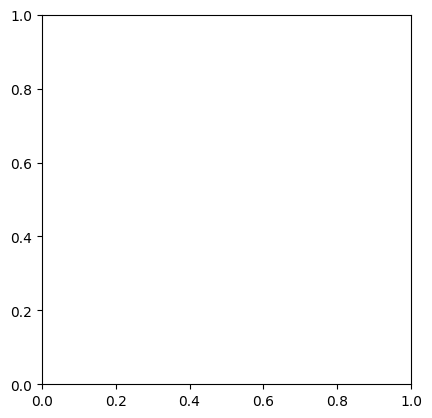

In [8]:
sample = '/Users/secchim/Downloads/CellProfiler/movie_processing/movie_output/VWF_043_MS211125_m3-homeostasis_movie_M1/VWF_043_MS211125_m3-homeostasis_movie_M1_Ch1_xyzCorrected.tif - T=2GFP.tiff'

sample_data = io.imread(sample)

sample_data

imshow(sample_data/sample_data.max())